# Credit Card Fraud Detection
## Done By
## Saisubramanian V


# Importing necessary libraries

In [1]:
import numpy as np # forlinear algebra
import pandas as pd # for data processing
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# Importing data


In [2]:
test="fraudTest.csv"
train="fraudTrain.csv"

# Exploring the data

In [4]:
train_data=pd.read_csv(train)
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [5]:
test_data=pd.read_csv(test)
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


Removing the duplicates in the dataset

In [6]:
train_data=train_data.drop_duplicates()

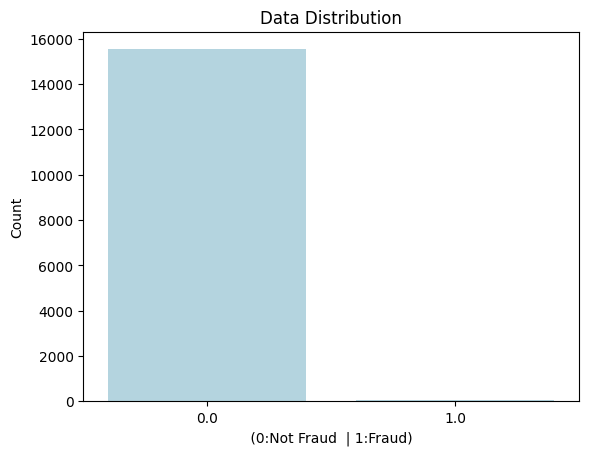

In [104]:
sns.countplot(x='is_fraud',color = "lightblue", data=pd.concat([train_data, test_data], ignore_index=True))
plt.title('Data Distribution')
plt.xlabel(' (0:Not Fraud  | 1:Fraud) ')
plt.ylabel('Count')
plt.show()

In [8]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7815 entries, 0 to 7814
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             7815 non-null   int64  
 1   trans_date_trans_time  7815 non-null   object 
 2   cc_num                 7815 non-null   int64  
 3   merchant               7815 non-null   object 
 4   category               7815 non-null   object 
 5   amt                    7815 non-null   float64
 6   first                  7815 non-null   object 
 7   last                   7815 non-null   object 
 8   gender                 7814 non-null   object 
 9   street                 7814 non-null   object 
 10  city                   7814 non-null   object 
 11  state                  7814 non-null   object 
 12  zip                    7814 non-null   float64
 13  lat                    7814 non-null   float64
 14  long                   7814 non-null   float64
 15  city

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7798 entries, 0 to 7797
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             7798 non-null   int64  
 1   trans_date_trans_time  7798 non-null   object 
 2   cc_num                 7798 non-null   int64  
 3   merchant               7798 non-null   object 
 4   category               7798 non-null   object 
 5   amt                    7798 non-null   float64
 6   first                  7798 non-null   object 
 7   last                   7798 non-null   object 
 8   gender                 7798 non-null   object 
 9   street                 7798 non-null   object 
 10  city                   7798 non-null   object 
 11  state                  7798 non-null   object 
 12  zip                    7798 non-null   int64  
 13  lat                    7798 non-null   float64
 14  long                   7798 non-null   float64
 15  city

# Data Cleaning

In [10]:
train_data.isnull().sum(),test_data.isnull().sum()

(Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   1
 street                   1
 city                     1
 state                    1
 zip                      1
 lat                      1
 long                     1
 city_pop                 1
 job                      1
 dob                      1
 trans_num                1
 unix_time                1
 merch_lat                1
 merch_long               1
 is_fraud                 1
 dtype: int64,
 Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     0
 state                    0
 zip 

In [11]:
cols_to_drop = ['Unnamed: 0','cc_num','merchant','first','last','trans_num','unix_time','street','category']
train_data.drop(columns=cols_to_drop,inplace = True)
test_data.drop(columns=cols_to_drop,inplace = True)

In [12]:
print(train_data.shape)
print(test_data.shape)

(7815, 14)
(7798, 14)


In [13]:
train_data['lat_dist'] = abs(round(train_data['merch_lat']-train_data['lat'],2))
train_data['long_dist'] = abs(round(train_data['merch_long']-train_data['long'],2))

test_data['lat_dist'] = abs(round(test_data['merch_lat']-test_data['lat'],2))
test_data['long_dist'] = abs(round(test_data['merch_long']-test_data['long'],2))

In [14]:
cols_to_drop = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','state']
train_data.drop(columns=cols_to_drop,inplace = True)
test_data.drop(columns=cols_to_drop,inplace = True)

In [15]:
train_data.head()

,amt,gender,zip,city_pop,is_fraud,lat_dist,long_dist
0,4.97,F,28654.0,3495.0,0.0,0.07,0.87
1,107.23,F,99160.0,149.0,0.0,0.27,0.02
2,220.11,M,83252.0,4154.0,0.0,0.97,0.11
3,45.00,M,59632.0,1939.0,0.0,0.80,0.45
4,41.96,M,24433.0,99.0,0.0,0.25,0.83


In [16]:
train_data.gender =[ 1 if value == "M" else 0 for value in train_data.gender]
test_data.gender =[ 1 if value == "M" else 0 for value in test_data.gender]

In [17]:
train_data.head()


,amt,gender,zip,city_pop,is_fraud,lat_dist,long_dist
0,4.97,0,28654.0,3495.0,0.0,0.07,0.87
1,107.23,0,99160.0,149.0,0.0,0.27,0.02
2,220.11,1,83252.0,4154.0,0.0,0.97,0.11
3,45.00,1,59632.0,1939.0,0.0,0.80,0.45
4,41.96,1,24433.0,99.0,0.0,0.25,0.83


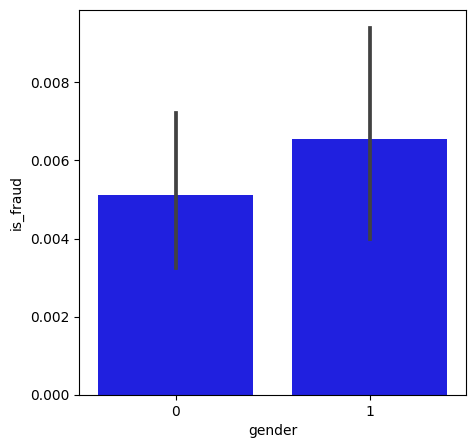

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(data=train_data,x='gender',y='is_fraud', color='blue')
plt.show()

# Splitting the Data

In [85]:
X_train = train_data.drop('is_fraud',axis=1).fillna(0)
X_test = test_data.drop('is_fraud',axis=1).fillna(0)
y_train = train_data['is_fraud'].fillna(0).fillna(0)
y_test = test_data['is_fraud'].fillna(0)

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_tran = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Model Building

1) Logistic Regression


In [97]:
from sklearn.linear_model import LogisticRegression
final_result = LogisticRegression()
final_result.fit(X_tran,y_train)
y_pred = final_result.predict(X_test)

In [99]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:}')

Accuracy: 0.9958963836881252


2) Decision Tree Classifier

In [101]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_tran,y_train)
y_pred = dtc.predict(X_test)

In [102]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:}')

Accuracy: 0.9906386252885355
